<a href="https://colab.research.google.com/github/s27369/PRO1D_s27369/blob/main/Lab5_MNIST_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

## Ładowanie i wstępna analiza

In [ ]:
import pandas as pd
path = "/content/"
df_train = pd.read_csv(f'{path}mnist_train.csv')
df_test = pd.read_csv(f'{path}mnist_test.csv')
print(df_train.shape)
print(df_test.shape)

(59999, 785)
(9999, 785)


In [ ]:
column_names = ['class'] + ['pixel{}'.format(i) for i in range(1, 785)]
df_train.columns = column_names
df_test.columns = column_names

In [ ]:
df_train.head(10)

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.head(10)

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, class to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


### Rozkład kategorii, wykres

In [ ]:
categories = df_train['class'].value_counts()
print(categories)

class
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5420
Name: count, dtype: int64


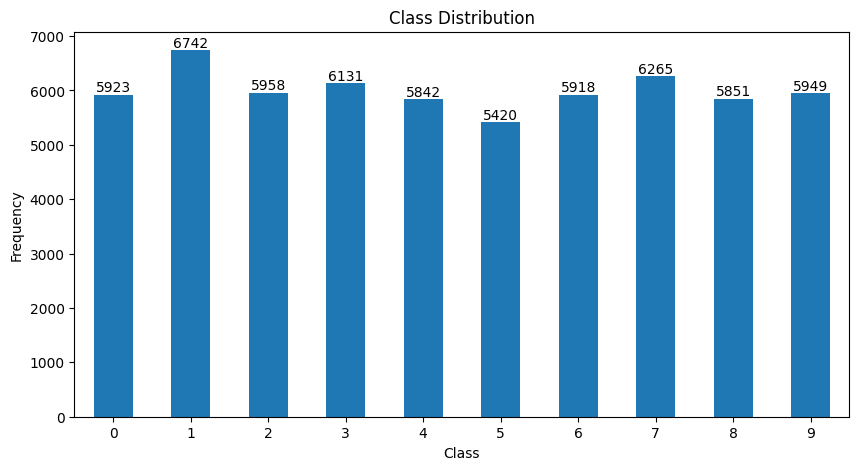

In [ ]:
import matplotlib.pyplot as plt

categories = categories.sort_index()
plt.figure(figsize=(10, 5))
categories.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.bar_label(plt.gca().containers[0])
plt.show()

### Podział test/train

In [ ]:
X_train = df_train.iloc[:,1:785]
y_train = df_train.iloc[:,0]
X_test = df_test.iloc[:,1:785]
y_test = df_test.iloc[:,0]

print(X_train.shape)
print(X_test.shape)

(59999, 784)
(9999, 784)


### Wyświetlenie 8 pierwszych obrazów

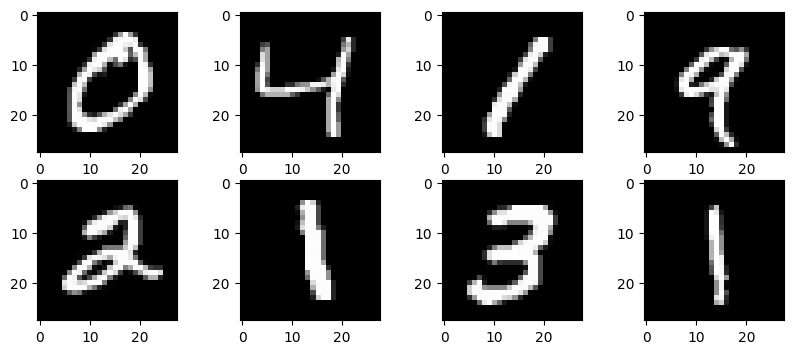

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,4))
for i in range(8):
    plt.subplot(240+1+i)
    ith_image = X_train.iloc[i,:]
    ith_image_arr = ith_image.to_numpy()
    ith_image= ith_image_arr.reshape(28,28)
    plt.imshow(ith_image, cmap=plt.get_cmap('gray'))

plt.show()

## Budowanie klasyfikatorów

In [ ]:
accuracy_scores = {}

In [ ]:
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
models = {"DT": DecisionTreeClassifier(),
          "RF": RandomForestClassifier(),
          "ET": ExtraTreesClassifier(n_estimators=100, criterion = 'entropy'),
          "XGB": xgb.XGBClassifier(n_estimators = 100, criterion ='entropy')}

In [ ]:
def build_and_eval(model_name, X_train, y_train):
    model = models[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    accuracy_scores[model_name] = accuracy

### 1. DT

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

build_and_eval("DT", X_train, y_train)


Accuracy: 0.8785878587858786
[[ 914    1    7    8    3    9   12    4   14    8]
 [   0 1099    9    1    3    3    5    2   10    3]
 [  14    7  883   30   12   14   13   25   26    8]
 [   7   12   29  856    6   41    5    8   22   24]
 [   5    3    7    3  870    6   19    9   17   43]
 [  13    6    8   38    6  751   21    4   28   17]
 [  14    2   11    8   21   21  853    1   23    4]
 [   3   14   27   17    4    7    3  922    9   21]
 [  14    6   29   36   24   25   17    9  786   28]
 [  14    6    7   17   44   16    8   17   29  851]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       980
           1       0.95      0.97      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.84      0.85      0.85      1010
           4       0.88      0.89      0.88       982
           5       0.84      0.84      0.84       892
           6       0.89      0.89      0.89       958
       

Optymalizacja hiperparametrów

In [ ]:
max_depths = [10, 20, 30, 40]
criterions = ['gini', 'entropy']

best_model = None;
best_accuracy = 0
best_params = {}

for max_depth in max_depths:
  for criterion in criterions:
    model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=501)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Max Depth: {max_depth}, Criterion: {criterion}, Accuracy: {accuracy}")

    if accuracy > best_accuracy:
      best_model = model
      best_accuracy = accuracy
      best_params = {'max_depth': max_depth, 'criterion': criterion}


print(f"\nNajlepsza dokładność: {best_accuracy}")
print(f"Najlepsze parametry: {best_params}")
tree_clf = best_model
accuracy_scores['DT(tuned)'] = best_accuracy

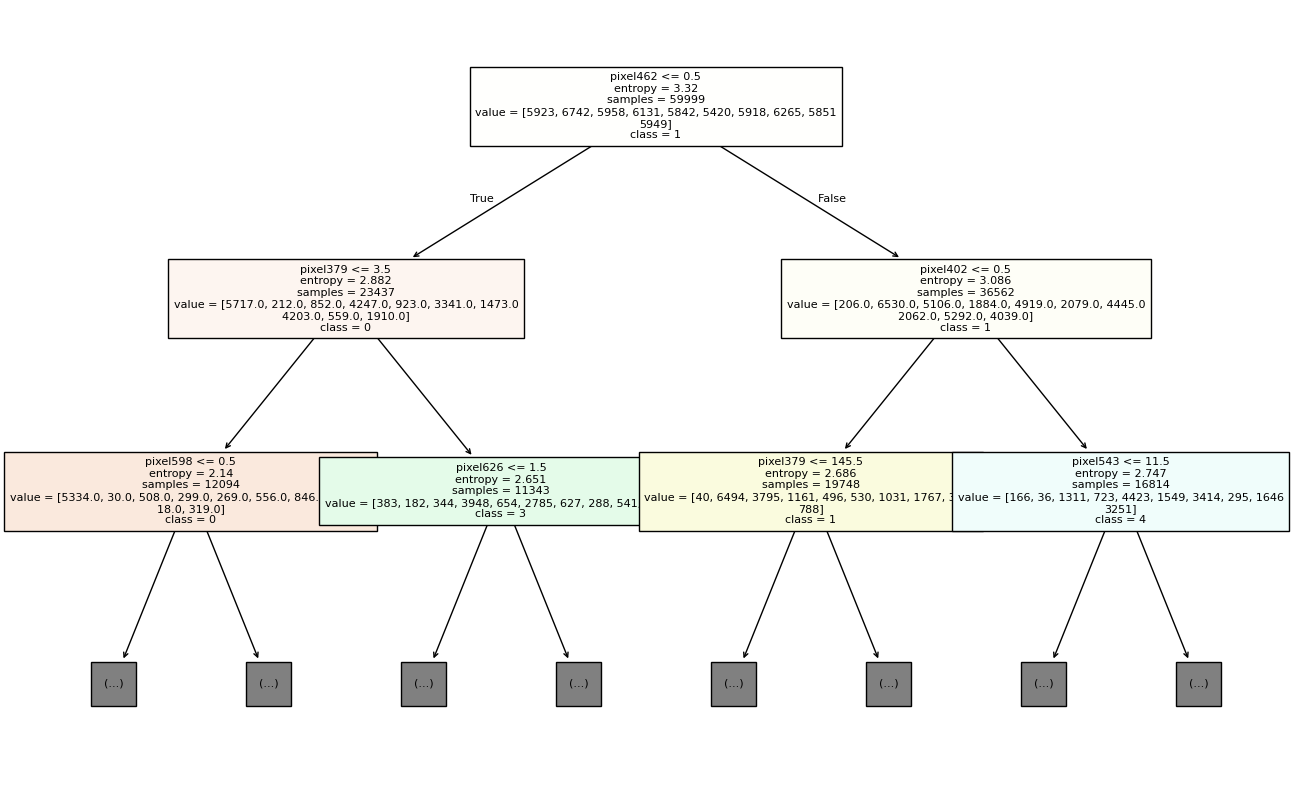

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
f_names = list(df_train.columns.values.tolist())
f_names = f_names[1:]
t_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
tree.plot_tree(tree_clf, max_depth=2, feature_names=f_names,
                   class_names=t_names, filled=True, fontsize=8)  # Adjust fontsize
plt.show()

In [ ]:
from sklearn.tree import export_text
f_names = list(df_train.columns.values.tolist())
f_names = f_names[1:]
r = export_text(tree_clf, feature_names = f_names, max_depth = 3)
print(r)

|--- pixel462 <= 0.50
|   |--- pixel379 <= 3.50
|   |   |--- pixel598 <= 0.50
|   |   |   |--- pixel515 <= 5.50
|   |   |   |   |--- truncated branch of depth 16
|   |   |   |--- pixel515 >  5.50
|   |   |   |   |--- truncated branch of depth 11
|   |   |--- pixel598 >  0.50
|   |   |   |--- pixel429 <= 0.50
|   |   |   |   |--- truncated branch of depth 15
|   |   |   |--- pixel429 >  0.50
|   |   |   |   |--- truncated branch of depth 13
|   |--- pixel379 >  3.50
|   |   |--- pixel626 <= 1.50
|   |   |   |--- pixel543 <= 1.50
|   |   |   |   |--- truncated branch of depth 14
|   |   |   |--- pixel543 >  1.50
|   |   |   |   |--- truncated branch of depth 13
|   |   |--- pixel626 >  1.50
|   |   |   |--- pixel298 <= 0.50
|   |   |   |   |--- truncated branch of depth 12
|   |   |   |--- pixel298 >  0.50
|   |   |   |   |--- truncated branch of depth 16
|--- pixel462 >  0.50
|   |--- pixel402 <= 0.50
|   |   |--- pixel379 <= 145.50
|   |   |   |--- pixel377 <= 5.50
|   |   |   |   |---

### RF

In [ ]:
build_and_eval("RF", X_train, y_train)

Accuracy: 0.9683968396839684
[[ 971    0    0    0    0    2    3    1    2    1]
 [   0 1121    3    3    0    2    3    0    2    1]
 [   6    0 1000    7    3    0    3    8    5    0]
 [   0    0   13  969    0    5    0    9   10    4]
 [   1    0    2    0  952    0    5    0    2   20]
 [   3    0    2   14    2  859    4    2    5    1]
 [   8    3    1    0    2    2  938    0    4    0]
 [   1    5   17    3    1    0    0  983    1   16]
 [   3    0    4    9    4    6    4    4  929   11]
 [   8    5    1   12   10    2    1    5    4  961]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
       

### Extra Tree

In [ ]:
build_and_eval("ET", X_train, y_train)

Accuracy: 0.9710971097109711
[[ 969    0    1    0    0    1    4    1    3    1]
 [   0 1123    3    3    0    2    2    0    1    1]
 [   6    0 1000    5    2    0    4   10    5    0]
 [   1    0    7  977    0    7    0    9    6    3]
 [   1    0    2    0  952    0    5    1    2   19]
 [   2    0    1    9    1  863    4    2    6    4]
 [   6    3    0    0    1    3  944    0    1    0]
 [   0    4   20    0    1    0    0  988    2   12]
 [   5    0    3    5    7    4    3    3  939    5]
 [   4    6    2   13   13    5    2    4    5  955]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.99      0.98       958
       

### XGB

In [ ]:
build_and_eval("XGB", X_train, y_train)

Accuracy: 0.9781978197819782
[[ 969    1    1    0    0    3    3    1    2    0]
 [   0 1125    3    2    0    1    2    1    1    0]
 [   4    0 1006    6    3    0    1    7    4    1]
 [   0    0    3  994    0    4    0    5    3    1]
 [   0    0    4    1  957    0    4    0    2   14]
 [   3    1    0    9    0  865    4    4    4    2]
 [   7    3    0    0    2    3  940    0    3    0]
 [   1    2   11    2    2    0    0  998    1   10]
 [   3    0    1    4    3    2    2    3  949    7]
 [   6    5    1    5    6    1    0    3    4  978]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
       

## Augmentacja

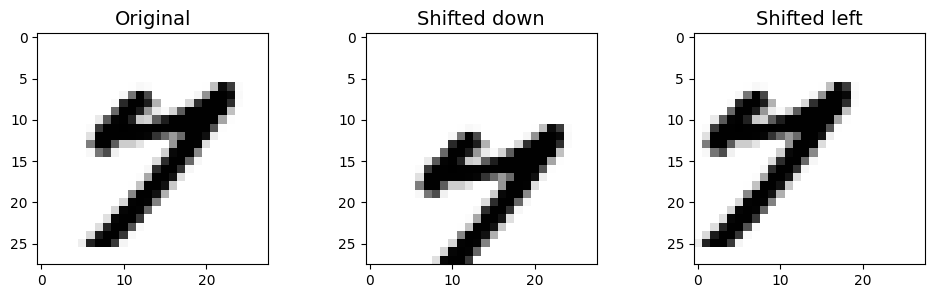

In [ ]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

import matplotlib.pyplot as plt
image = X_train.iloc[1000,:]
image_arr = image.to_numpy()
image = image_arr.reshape((28,28))
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [ ]:
X_train_augmented = pd.DataFrame(columns=X_train.columns)

# Initialize y_train_augmented as an empty list
y_train_augmented = []
n = 1
shifts = [(0, n), (n, 0), (0, -n), (-n, 0)]

for dx, dy in shifts:
    shifted_images = np.apply_along_axis(
        lambda image: shift_image(image, dx, dy), 1, X_train.values
    )

    shifted_df = pd.DataFrame(shifted_images, columns=X_train.columns)
    X_train_augmented = pd.concat([X_train_augmented, shifted_df], ignore_index=True)

    y_train_augmented.extend(y_train.tolist())

y_train_augmented = pd.Series(y_train_augmented)

print(X_train_augmented.shape)
print(y_train_augmented.shape)

(239996, 784)
(239996,)


In [ ]:
# models["DT (tuned)"] = DecisionTreeClassifier(max_depth=best_params["max_depth"], criterion=best_params['criterion'], random_state=420)
# models.pop("DT (tuned)")

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=420)

In [ ]:
models.keys()

dict_keys(['DT', 'RF', 'ET', 'XGB', 'DT (aug)', 'RF (aug)', 'ET (aug)', 'XGB (aug)'])

In [ ]:
models["DT (aug)"] = DecisionTreeClassifier(max_depth=best_params["max_depth"], criterion=best_params['criterion'], random_state=420)
models["RF (aug)"] = RandomForestClassifier(n_estimators=100, random_state=420)
models["ET (aug)"] = ExtraTreesClassifier(n_estimators=100, criterion ='entropy', random_state=420)
models["XGB (aug)"] = xgb.XGBClassifier(n_estimators = 100, criterion ='entropy')


### DT

In [ ]:
import time
def build_and_eval_aug(model_name, X_train, y_train):
    model = models[model_name]
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    exec_time = time.time() - start
    print(f"Time: {exec_time}")
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    accuracy_scores[model_name] = accuracy

In [ ]:
build_and_eval_aug("DT (aug)", X_train_augmented, y_train_augmented)

Time: 84.92073202133179
Accuracy: 0.9131913191319132
[[ 932    0    7    4    5    6   10    4    9    3]
 [   0 1115    4    2    2    2    2    2    5    1]
 [   5    5  935   20   10    4    8   18   23    4]
 [   6    6   17  895    5   29    4   17   16   15]
 [   1    7    7    2  890    7    2    6    9   51]
 [   7    6    9   35    6  776   16    6   22    9]
 [  12    4    7    3   15   23  878    1   13    2]
 [   2    8   14    4   10    3    0  961    6   19]
 [  12   12   20   23    9   12   19    4  846   17]
 [   1    3    7   11   33   15    4   15   17  903]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.91      0.91      0.91      1032
           3       0.90      0.89      0.89      1010
           4       0.90      0.91      0.90       982
           5       0.88      0.87      0.88       892
           6       0.93      0.92    

In [ ]:
build_and_eval_aug("RF (aug)", X_train_augmented, y_train_augmented)

Time: 244.87956070899963
Accuracy: 0.9778977897789779
[[ 975    0    0    0    0    1    2    1    1    0]
 [   0 1126    3    2    0    0    1    0    2    1]
 [   4    0 1010    3    1    0    1    5    7    1]
 [   0    0    4  983    0    6    0    9    6    2]
 [   0    0    1    0  955    0    4    0    2   20]
 [   3    0    1    9    2  867    2    1    4    3]
 [   7    4    0    0    2    3  938    0    4    0]
 [   1    3   14    1    0    0    0  997    2    9]
 [   3    0    1    1    2    2    1    2  957    5]
 [   5    3    1   10    5    6    0    5    4  970]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98   

In [ ]:
build_and_eval_aug("ET (aug)", X_train_augmented, y_train_augmented)

Time: 212.52083373069763
Accuracy: 0.9811981198119812
[[ 971    0    0    0    0    2    4    1    2    0]
 [   0 1127    2    2    0    1    1    0    1    1]
 [   1    0 1015    3    2    0    2    7    2    0]
 [   0    0    5  989    0    4    0    6    5    1]
 [   1    0    2    0  959    0    4    0    2   14]
 [   3    0    0    6    0  872    4    1    4    2]
 [   7    2    0    0    2    3  943    0    1    0]
 [   0    4   12    0    0    0    0 1000    1   10]
 [   3    0    1    2    2    3    1    3  957    2]
 [   4    3    0    6    3    4    1    5    5  978]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98   

In [ ]:
for col in X_train_augmented.columns:
    X_train_augmented[col] = pd.to_numeric(X_train_augmented[col])
build_and_eval_aug("XGB (aug)", X_train_augmented, y_train_augmented)

Time: 1463.2931153774261
Accuracy: 0.9851985198519851
[[ 974    0    0    1    0    0    1    1    3    0]
 [   0 1128    2    1    1    0    1    2    0    0]
 [   0    0 1018    2    1    0    0    6    5    0]
 [   0    1    1  995    0    3    0    5    3    2]
 [   1    0    1    0  962    0    3    0    2   13]
 [   2    0    0    7    1  876    2    1    2    1]
 [   4    3    0    0    3    3  941    0    4    0]
 [   0    1   10    0    1    0    0 1007    2    6]
 [   2    0    1    0    0    3    1    1  964    2]
 [   6    2    1    2    5    2    0    3    2  986]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98   

## Wizualizacja wyników

In [70]:
accuracy_scores.pop('DT (tuned)')

0.14421442144214422

In [71]:
accuracy_scores

{'DT': 0.8785878587858786,
 'DT(tuned)': 0.886988698869887,
 'RF': 0.9683968396839684,
 'ET': 0.9710971097109711,
 'XGB': 0.9781978197819782,
 'DT (aug)': 0.9131913191319132,
 'RF (aug)': 0.9778977897789779,
 'ET (aug)': 0.9811981198119812,
 'XGB (aug)': 0.9851985198519851}

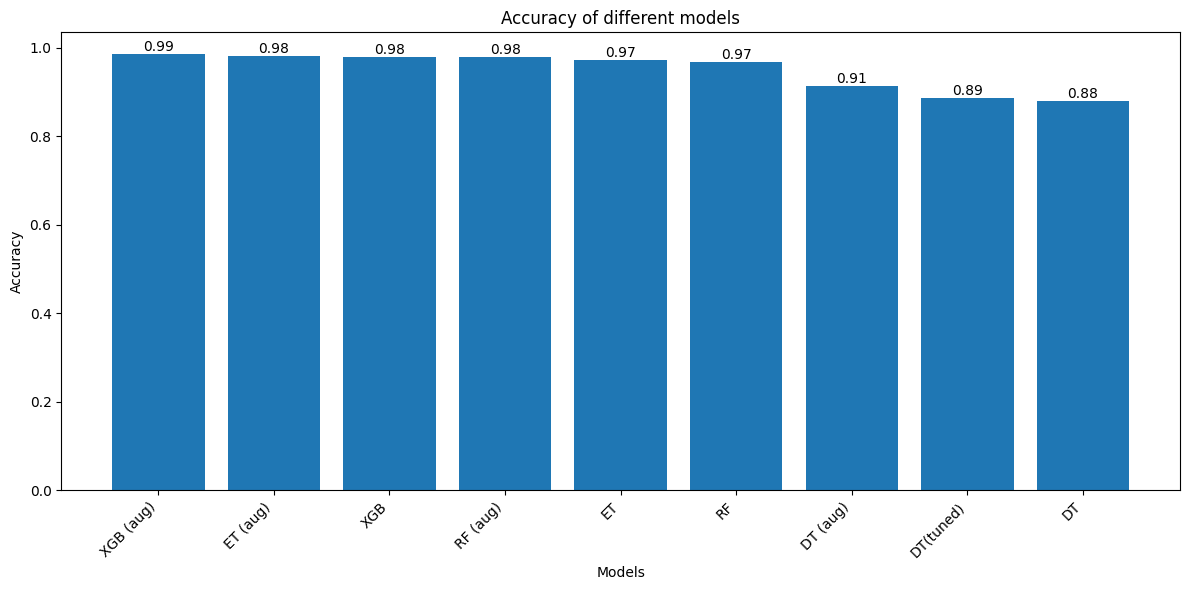

In [72]:
model_names = list(accuracy_scores.keys())
accuracy_values = list(accuracy_scores.values())

sorted_data = sorted(zip(model_names, accuracy_values), key=lambda item: item[1], reverse=True)
sorted_model_names, sorted_accuracy_values = zip(*sorted_data)

x_pos = np.arange(len(sorted_model_names))

plt.figure(figsize=(12, 6))
bars = plt.bar(x_pos, sorted_accuracy_values)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of different models")
plt.xticks(x_pos, sorted_model_names, rotation=45, ha='right')

for bar, score in zip(bars, sorted_accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

1. Dla danych oryginalnych: Który  
klasyfikator jest najlepszy i z jakimi parametrami?
2. Dla danych z augmentacją: Który klasyfikator jest najlepszy?
3. Czy warto zrobić aumentację obrazów?

Wnioski:
 1. Najlepszy jest XGB z wynikiem 0.98
 2. Najlepszy jest XGB (aug) z wynikiem 0.99
 3. Tak.